In [6]:
import statistics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
filepath = "./capturequic_c_20231116_pcap.csv"
df = pd.read_csv(filepath, sep='@')

cond_s = df['ip.src'] == '192.168.1.78'
df_s = df[cond_s]
df_s[:20]
# cond_c = df['ip.src'] == '192.168.1.79'
# df_c  = df[cond_c]
# # frame_type == 3：ACK for STREAM
# cond_ack = df_s['quic.frame_type'].str.contains('3', na=False)
# df_s_ack = df_s[cond_ack]


,frame.number,quic.packet_number,frame.time,frame.time_epoch,frame.len,quic.frame_type,_ws.col.protocol,ip.proto,ip.len,ip.src,ip.dst,udp.length,udp.srcport,udp.dstport,udp.payload,quic.stream_data,_ws.col.info,quic.ack.largest_acknowledged,quic.ack.ack_delay
2,3,0.0,"Nov 16, 2023 16:42:28.400731000 CST",1.700124e+09,1294,"2,0,6",QUIC,17,1280,192.168.1.78,192.168.1.79,1260,4242,55867,c2000000010004250c685e0041ad7b445a9ae34c705c6b...,NaN,"Handshake, SCID=250c685e",0.0,0.0
3,4,1.0,"Nov 16, 2023 16:42:28.400733000 CST",1.700124e+09,79,2,QUIC,17,65,192.168.1.78,192.168.1.79,45,4242,55867,c8000000010004250c685e004017fa0bac3df3bc227f04...,NaN,"Initial, SCID=250c685e, PKN: 1, ACK",2.0,0.0
8,9,NaN,"Nov 16, 2023 16:42:28.405706000 CST",1.700124e+09,298,NaN,QUIC,17,284,192.168.1.78,192.168.1.79,264,4242,55867,4cc54504e822106b1c9da2b6eee01d6a63386c6432baca...,NaN,Protected Payload (KP0),NaN,NaN
11,12,NaN,"Nov 16, 2023 16:42:29.013884000 CST",1.700124e+09,1394,NaN,QUIC,17,1380,192.168.1.78,192.168.1.79,1360,4242,55867,58d2699e27cdd6fad96b1c2caf9d9763bde1fc48541f12...,NaN,Protected Payload (KP0),NaN,NaN
12,13,NaN,"Nov 16, 2023 16:42:29.040139000 CST",1.700124e+09,70,NaN,QUIC,17,56,192.168.1.78,192.168.1.79,36,4242,55867,53445e5a6de8fb70dfe13198b24688a8d155695613847d...,NaN,Protected Payload (KP0),NaN,NaN
15,16,NaN,"Nov 16, 2023 16:42:29.420296000 CST",1.700124e+09,1444,NaN,QUIC,17,1430,192.168.1.78,192.168.1.79,1410,4242,55867,5db8db807e611191891d59b0b905c03f7259f88950f41a...,NaN,Protected Payload (KP0),NaN,NaN
16,17,NaN,"Nov 16, 2023 16:42:29.445750000 CST",1.700124e+09,70,NaN,QUIC,17,56,192.168.1.78,192.168.1.79,36,4242,55867,4e02c08f5cdc30d740521d67c256e6d81defc09a41900b...,NaN,Protected Payload (KP0),NaN,NaN
19,20,NaN,"Nov 16, 2023 16:42:29.934027000 CST",1.700124e+09,1469,NaN,QUIC,17,1455,192.168.1.78,192.168.1.79,1435,4242,55867,5d5b1c2b598526fa93e659eff468df77b3de4b57912e61...,NaN,Protected Payload (KP0),NaN,NaN
20,21,NaN,"Nov 16, 2023 16:42:29.959742000 CST",1.700124e+09,70,NaN,QUIC,17,56,192.168.1.78,192.168.1.79,36,4242,55867,5eac84c1f6e58f6382327107db7cae18781462086ba7fa...,NaN,Protected Payload (KP0),NaN,NaN
23,24,NaN,"Nov 16, 2023 16:42:30.445172000 CST",1.700124e+09,1481,NaN,QUIC,17,1467,192.168.1.78,192.168.1.79,1447,4242,55867,575bd1dd61e01b3e9013e9fb48a32866065974073bf15c...,NaN,Protected Payload (KP0),NaN,NaN


In [8]:
# Create an empty list to hold the results
rows = []

delete_row = []

for i in df_s_ack.index:
    idx = df.iloc[i]['quic.ack.largest_acknowledged']
    idx = int(idx)
    filtered_data = df_c[df_c['quic.packet_number'] == str(idx)]
    filtered_data = filtered_data[filtered_data['quic.frame_type'].str.contains('12', na=False)]
    if filtered_data[filtered_data['quic.frame_type'].str.contains('12', na=False)].empty == True:
        df_s_ack = df_s_ack.drop(i)
        print(i, "HI")
        continue
    rows.append(filtered_data)

# Now concatenate the rows to create the resulting DataFrame
df_c_acked_stream = pd.concat(rows) # Transpose the DataFrame if needed

df_c_acked_stream[:5]

ValueError: No objects to concatenate

In [ ]:
print(df_s_ack.index)
print(len(df_s_ack))

Index([ 12,  16,  20,  24,  27,  29,  31,  33,  35,  37,
       ...
       251, 253, 255, 257, 259, 261, 263, 265, 267, 269],
      dtype='int64', length=120)
120


In [ ]:
df['quic.frame_type'].iloc[12]

'3'

In [ ]:
if len(df_s_ack) != len(df_c_acked_stream):
    print("length not match", len(df_s_ack), len(df_c_acked_stream))
for i in range(len(df_s_ack)):
    if int(df_c_acked_stream['quic.packet_number'].iloc[i]) != int(df_s_ack['quic.ack.largest_acknowledged'].iloc[i]):
        print("packet not match!", df_c_acked_stream['quic.packet_number'].iloc[i], int(df_s_ack['quic.ack.largest_acknowledged'].iloc[i]))
print("check done!")

check done!


## Calculate Round-Trip-Time
1. send time - receive time
2. Show it as an IQR

In [ ]:
rtt_list = []
for i in range(len(df_s_ack)):
    rtt_list.append(1000*((df_s_ack['frame.time_epoch'].iloc[i] - df_c_acked_stream['frame.time_epoch'].iloc[i] - df_s_ack['quic.ack.ack_delay'].iloc[i] / 1000000)))

In [ ]:
stdev = statistics.stdev(rtt_list)
mean = statistics.mean(rtt_list)
median = statistics.median(rtt_list)
print("standard deviation:", stdev)
print("mean:", mean)
print("median:", median)

NameError: name 'statistics' is not defined

In [ ]:
q1, q3 = np.percentile(rtt_list, [25, 75])
iqr = q3 - q1

lower_fence = q1 - (1.5*iqr)
higher_fence = q3 + (1.5*iqr)

print(q1, q3, iqr, lower_fence, higher_fence)

0.05834576238250732 0.11300217101669312 0.0546564086341858 -0.023638850568771373 0.1949867839679718


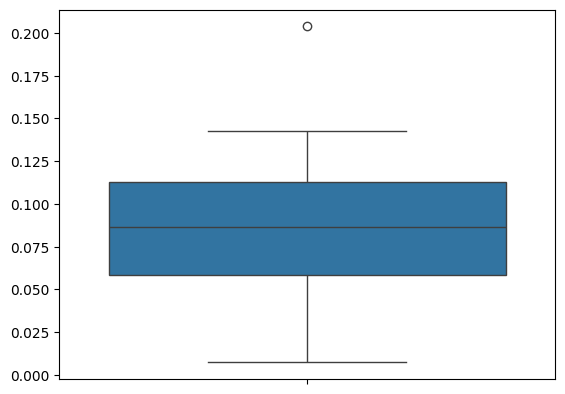

In [ ]:
sns.boxplot(rtt_list)
plt.show()

## Re-Transmission

In [ ]:
print(len(df_c_acked_stream))

120


In [ ]:
x = df_c_acked_stream['quic.stream_data'].iloc[0]
t = int(x[16:24], 16)
usec = int(x[24:32], 16)
# seq = int(x[32:40], 16)
print(t, usec)

1700124148 902535000


In [ ]:
tList = []
usecList = []
t = 0
usec = 0
for i in range(len(df_c_acked_stream)):
    idx = df_c_acked_stream['quic.packet_number'].iloc[i]
    x = df_c_acked_stream['quic.stream_data'].iloc[i]
    t = int(x[16:24], 16)
    usec = int(x[24:32], 16)
    tList.append(t)
    usecList.append(usec)
    print(idx, t, usec)

4 1700124148 902535000
6 1700124149 402748000
8 1700124149 902968000
10 1700124150 403259000
12 1700124150 903604000
13 1700124151 403886000
14 1700124151 904298000
15 1700124152 404760000
16 1700124152 905229000
17 1700124153 405814000
18 1700124153 906022000
19 1700124154 406606000
23 1700124154 907329000
24 1700124155 408158000
25 1700124155 909270000
26 1700124156 409861000
27 1700124156 910999000
31 1700124157 412191000
32 1700124157 912416000
33 1700124158 413615000
35 1700124158 914830000
36 1700124159 415983000
37 1700124159 917118000
38 1700124160 418265000
39 1700124160 919521000
40 1700124161 420736000
41 1700124161 921919000
42 1700124162 423106000
46 1700124162 924359000
47 1700124163 424636000
48 1700124163 925313000
49 1700124164 426514000
50 1700124164 927691000
51 1700124165 428944000
52 1700124165 930127000
53 1700124166 431298000
54 1700124166 932429000
55 1700124167 433569000
56 1700124167 934737000
57 1700124168 436035000
59 1700124168 937205000
60 1700124169 43844

In [ ]:
df_c_stream = df[df['quic.frame_type'] == '12']

print(len(df_c_stream))
df_c_stream[:5]

127


,frame.number,quic.packet_number,frame.time,frame.time_epoch,frame.len,quic.frame_type,_ws.col.Protocol,ip.proto,ip.len,ip.src,ip.dst,udp.length,udp.srcport,udp.dstport,udp.payload,quic.stream_data,_ws.col.Info,quic.ack.largest_acknowledged,quic.ack.ack_delay
10,11,4,"Nov 16, 2023 16:42:28.902790000 CST",1.700124e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,55867,4242,54504d7fb1bddcc9a2aa5a0bc1ff4bae93efe451f70583...,000425d401df5e766555d5f435cb9758b433562adf00f2...,"Protected Payload (KP0), DCID=504d7fb1, PKN: 4...",NaN,NaN
14,15,6,"Nov 16, 2023 16:42:29.403142000 CST",1.700124e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,55867,4242,5f504d7fb16a6da7fb10acc9c3a57072c3d906a0b2c7cd...,000425d401df5e766555d5f51801726026c2e7d0540dad...,"Protected Payload (KP0), DCID=504d7fb1, PKN: 6...",NaN,NaN
18,19,8,"Nov 16, 2023 16:42:29.903401000 CST",1.700124e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,55867,4242,51504d7fb14e395ac02c98aa7244e67c09ca70d9642e14...,000425d401df5e766555d5f535d232c09a67b2e113b76c...,"Protected Payload (KP0), DCID=504d7fb1, PKN: 8...",NaN,NaN
22,23,10,"Nov 16, 2023 16:42:30.403688000 CST",1.700124e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,55867,4242,5c504d7fb124656feac0cec8c2f5c722a5fffc77739dea...,000425d401df5e766555d5f618093e7811eccd2751a4a7...,"Protected Payload (KP0), DCID=504d7fb1, PKN: 1...",NaN,NaN
26,27,12,"Nov 16, 2023 16:42:30.904023000 CST",1.700124e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,55867,4242,41504d7fb1d22cd7c3b9f3649383d29a07c038d76a6a07...,000425d401df5e766555d5f635dbe7205b4c5a5a110a6b...,"Protected Payload (KP0), DCID=504d7fb1, PKN: 1...",NaN,NaN


In [ ]:
df_c_stream[12:15]
# print(df_c_stream[21])
# print(df_c_stream[22])

,frame.number,quic.packet_number,frame.time,frame.time_epoch,frame.len,quic.frame_type,_ws.col.Protocol,ip.proto,ip.len,ip.src,ip.dst,udp.length,udp.srcport,udp.dstport,udp.payload,quic.stream_data,_ws.col.Info,quic.ack.largest_acknowledged,quic.ack.ack_delay
42,43,20,"Nov 16, 2023 16:42:34.907580000 CST",1.700124e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,55867,4242,5f504d7fb19e9b08fca77ce8e0811301b84e71716b93c7...,000425d401df5e766555d5fa3614bde81926672324fd4e...,"Protected Payload (KP0), DCID=504d7fb1, PKN: 2...",NaN,NaN
43,44,22,"Nov 16, 2023 16:42:35.108449000 CST",1.700124e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,55867,4242,43504d7fb1ddf314a1f5c028f7cb27a637905e67e200ef...,000425d401df5e766555d5fa3614bde81926672324fd4e...,"Protected Payload (KP0), DCID=504d7fb1, PKN: 2...",NaN,NaN
44,45,23,"Nov 16, 2023 16:42:35.108481000 CST",1.700124e+09,319,12,QUIC,17,305,192.168.1.79,192.168.1.78,285,55867,4242,48504d7fb155b30a64a0a009177227e3facde6b1c99d7e...,000425d401df5e766555d5fa3614bde81926672324fd4e...,"Protected Payload (KP0), DCID=504d7fb1, PKN: 2...",NaN,NaN
